<a href="https://colab.research.google.com/github/bulee5328/DataProcessing-back/blob/minsoo/mainProcess.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [48]:
import yfinance as yf
import numpy as np
import pandas as pd
from scipy.optimize import minimize
import scipy.optimize as sco

In [2]:
df = pd.read_csv("/content/drive/MyDrive/3-2/dataprocess/팀플/code/sp500_symbols_filtered.csv")
symbols = df["Symbol"].tolist()

In [4]:
df = pd.read_csv("/content/drive/MyDrive/3-2/dataprocess/팀플/code/stock_analysis_cleaned.csv")
df

,Ticker,ROE (Return on Equity),ROA (Return on Assets),P/E Ratio (PER),Debt/Equity Ratio,Current Ratio,Quick Ratio,Revenue Growth (YoY),Earnings Growth (YoY),EPS Growth (Next 5 Years),σ (std),MDD,6개월 수익률,20일 이동평균선,60일 이동평균선,이평괴리율(20일),RSI(14),MACD,Signal
0,A,0.19881,0.08354,34.196260,56.421,2.248,1.542,0.101,0.216,0.191,0.019820,-0.347962,0.273287,144.712000,133.136644,0.011388,52.133021,3.119605,3.607795
1,AMD,0.05317,0.02598,127.072914,6.366,2.308,1.176,0.356,0.603,0.612,0.037150,-0.456837,1.169482,244.763998,195.271500,-0.003203,52.738654,12.174842,16.326362
2,MMM,0.72921,0.07971,26.784344,281.904,1.842,1.027,0.035,-0.375,-0.392,0.018679,-0.187145,0.122925,162.753500,157.621590,0.030208,51.857191,2.362866,2.455813
3,AES,0.05106,0.02269,9.348684,302.896,0.723,0.376,0.019,0.253,0.268,0.031704,-0.288895,0.162221,14.148223,13.553556,0.004366,51.457458,0.075405,0.106941
4,AOS,0.28209,0.13878,17.835579,12.063,1.544,0.894,0.044,0.146,0.099,0.015382,-0.205452,-0.046635,67.390339,70.334005,-0.018109,30.608175,-1.252365,-1.256668
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
382,WST,0.16945,0.10222,40.810370,9.930,2.870,2.016,0.077,0.038,0.029,0.035600,-0.452350,0.277153,279.310503,263.378834,-0.013750,47.987673,3.184095,5.245684
383,XYL,0.08555,0.04799,39.031010,18.253,1.957,1.320,0.078,0.045,0.046,0.015548,-0.218578,0.197138,148.817500,145.029321,0.015002,62.714118,1.524895,1.534392
384,ZBRA,0.14286,0.06394,26.299698,62.984,1.607,1.132,0.052,-0.254,-0.263,0.028280,-0.492912,-0.138071,283.223000,300.271834,-0.079771,28.629035,-11.350609,-8.941579
385,ZBH,0.06421,0.04333,22.017370,64.523,2.428,1.209,0.097,-0.057,-0.073,0.019321,-0.222549,-0.085261,98.781500,100.665027,-0.101755,24.801464,-2.536237,-0.968005


In [10]:
# columns = df.columns
# columns = columns.drop('Ticker')
# columns

In [9]:
selected_features = ['ROE (Return on Equity)','ROA (Return on Assets)','P/E Ratio (PER)',
                     'Debt/Equity Ratio','Current Ratio','Quick Ratio',
                     'Revenue Growth (YoY)','Earnings Growth (YoY)','EPS Growth (Next 5 Years)',
                     '20일 이동평균선','RSI(14)','MACD',
                     ]
selected_features

['ROE (Return on Equity)',
 'ROA (Return on Assets)',
 'P/E Ratio (PER)',
 'Debt/Equity Ratio',
 'Current Ratio',
 'Quick Ratio',
 'Revenue Growth (YoY)',
 'Earnings Growth (YoY)',
 'EPS Growth (Next 5 Years)',
 '20일 이동평균선',
 'RSI(14)',
 'MACD']

In [ ]:
# value_list_copy = data_bind.copy()
# value_list_copy['DY'] = 1 / value_list_copy['DY']   #  배당수익률이 높을수록 가치주에 포함되므로 역수를 취하면 저 PER,저 PBR 등과 의미 상통
# value_list_copy = value_list_copy[['PER', 'PBR', 'PCR', 'PSR', "DY"]]
# value_rank_all = value_list_copy.rank(axis=0)      # 각 지표의 순위를 열방향으로
# value_rank_all.corr()                              # 각 지표간 상관계수 구기기


In [ ]:
# value_sum_all = value_rank_all.sum(axis=1, skipna=False).rank()  # 행방향으로 순위합으로 다시 순위를 매긴다.
# data_bind.loc[value_sum_all <= 20]

In [15]:
df_copy = df.copy()
df_copy = df_copy[selected_features]
df_rank_all = df_copy.rank(axis=0)
# df_rank_all.corr()

In [19]:
value_sum_all = df_rank_all.sum(axis=1, skipna=False).rank()
result_df = df[['Ticker']+selected_features].loc[value_sum_all <= 20]
result_df

,Ticker,ROE (Return on Equity),ROA (Return on Assets),P/E Ratio (PER),Debt/Equity Ratio,Current Ratio,Quick Ratio,Revenue Growth (YoY),Earnings Growth (YoY),EPS Growth (Next 5 Years),20일 이동평균선,RSI(14),MACD
21,AIG,0.07688,0.01782,13.834532,22.480,0.617,0.214,-0.041,0.323,0.131,78.518000,42.884996,-0.662645
40,AVB,0.09754,0.02813,21.581198,73.165,0.707,0.090,0.044,0.024,0.024,181.940500,31.124894,-3.396115
70,CHTR,0.31327,0.05546,5.836106,497.907,0.375,0.313,-0.009,-0.054,-0.112,239.673499,20.082486,-12.778943
84,CMCSA,0.24186,0.05107,4.504983,101.462,0.882,0.689,-0.027,-0.042,-0.082,28.628000,26.904396,-0.934995
85,CAG,0.09654,0.04667,9.593220,92.867,1.058,0.401,-0.058,-0.649,-0.648,17.638689,33.571587,-0.347690
114,DHI,0.14321,0.07882,12.495247,24.111,5.005,0.484,-0.032,-0.224,-0.295,151.772001,14.169212,-4.703263
131,EG,0.03595,0.00746,24.450148,23.337,0.408,0.287,-0.009,-0.484,-0.499,332.577000,36.671400,-6.778351
132,EVRG,0.08454,0.02866,20.978080,142.450,0.516,0.105,-0.001,0.005,0.020,77.493000,40.514055,0.130254
135,EXR,0.06786,0.03347,29.194632,94.252,1.460,0.192,0.034,-0.142,-0.141,142.632497,17.650824,-3.611985
148,FTV,0.10365,0.04829,20.208662,52.244,0.701,0.492,0.023,-0.742,-0.752,49.848500,62.128351,0.548555


In [26]:
tickers = result_df['Ticker'].tolist()
tickers

['AIG',
 'AVB',
 'CHTR',
 'CMCSA',
 'CAG',
 'DHI',
 'EG',
 'EVRG',
 'EXR',
 'FTV',
 'GPN',
 'MAA',
 'MHK',
 'MDLZ',
 'NCLH',
 'OXY',
 'PNW',
 'LUV',
 'SWK',
 'TSN']

In [27]:
data = yf.download(tickers, start='2010-01-05', end='2025-10-21', auto_adjust=False)['Adj Close']

# 데이터 확인
print(data.head())

[*********************100%***********************]  20 of 20 completed

Ticker            AIG        AVB        CAG  CHTR     CMCSA        DHI  \
Date                                                                     
2010-01-05  18.531811  48.227501  10.440171  35.0  5.941529   9.749547   
2010-01-06  18.411760  47.772728  10.404181  35.0  5.898936   9.833884   
2010-01-07  18.057930  47.868435  10.435673  35.0  6.023161  10.348349   
2010-01-08  18.538126  47.509377  10.354705  33.5  6.005417  10.264008   
2010-01-11  18.721355  48.161705  10.530132  33.5  5.966374  10.323048   

Ticker             EG       EVRG       EXR  FTV        GPN        LUV  \
Date                                                                    
2010-01-05  60.301464  11.620378  6.869807  NaN  24.839876  10.195232   
2010-01-06  60.279984  11.685085  6.893075  NaN  24.750076   9.892061   
2010-01-07  60.401707  11.609592  6.840720  NaN  24.594124  10.039315   
2010-01-08  60.294312  11.712046  6.689480  NaN  23.143244   9.814102   
2010-01-11  60.695332  11.889992  6.741832 

In [29]:
data.isnull().sum()

,0
Ticker,
AIG,0
AVB,0
CAG,0
CHTR,0
CMCSA,0
DHI,0
EG,0
EVRG,0
EXR,0


In [30]:
filtered_data = data.dropna(axis=1)
filtered_data

Ticker,AIG,AVB,CAG,CHTR,CMCSA,DHI,EG,EVRG,EXR,GPN,LUV,MAA,MDLZ,MHK,OXY,PNW,SWK,TSN
Date,,,,,,,,,,,,,,,,,,
2010-01-05,18.531811,48.227501,10.440171,35.000000,5.941529,9.749547,60.301464,11.620378,6.869807,24.839876,10.195232,26.406418,13.224011,48.119999,50.590893,18.885124,36.225552,9.303265
2010-01-06,18.411760,47.772728,10.404181,35.000000,5.898936,9.833884,60.279984,11.685085,6.893075,24.750076,9.892061,26.494171,13.315940,47.930000,51.197975,19.082376,37.133221,9.773278
2010-01-07,18.057930,47.868435,10.435673,35.000000,6.023161,10.348349,60.401707,11.609592,6.840720,24.594124,10.039315,26.620304,13.283765,48.770000,50.817783,19.046040,38.440536,9.944870
2010-01-08,18.538126,47.509377,10.354705,33.500000,6.005417,10.264008,60.294312,11.712046,6.689480,23.143244,9.814102,26.444801,13.297554,49.639999,51.339020,19.165434,38.894386,9.922485
2010-01-11,18.721355,48.161705,10.530132,33.500000,5.966374,10.323048,60.695332,11.889992,6.741832,22.599751,9.926709,26.581913,13.237803,49.430000,50.872982,19.476900,38.657291,9.788198
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2025-10-14,82.910004,185.419998,18.127445,266.250000,29.990000,156.740005,356.739990,78.089996,147.839996,86.470001,33.419998,132.244995,62.130001,125.709999,42.279999,92.489311,67.019997,52.849998
2025-10-15,81.260002,184.000000,17.970667,264.559998,29.719999,155.240005,348.549988,78.650002,149.190002,86.099998,33.560001,132.000000,61.660000,127.449997,41.880001,92.746643,67.720001,52.810001
2025-10-16,77.019997,184.460007,17.902077,255.339996,29.260000,152.919998,340.850006,77.500000,152.000000,83.660004,33.290001,131.429993,61.599998,126.989998,41.040001,92.043945,67.910004,52.160000


In [32]:
filtered_data.isnull().sum()

,0
Ticker,
AIG,0
AVB,0
CAG,0
CHTR,0
CMCSA,0
DHI,0
EG,0
EVRG,0
EXR,0


In [33]:
universe = filtered_data
df=universe.resample('M').last().pct_change(1) # 월간수익률 변환

/tmp/ipython-input-3726877556.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df=universe.resample('M').last().pct_change(1) # 월간수익률 변환


In [50]:
covmat= np.array(filtered_data.pct_change(1).cov()*12)            # 자산별 수익률의 공분산  (월별수익률의 연율화)
avg_returns= np.array(filtered_data.pct_change(1).mean()*12)      #  자산별 기대수익률 (월별수익률의 연율화)
names = filtered_data.columns.tolist()
n_assets = len(names)     # 대상자산수
rf = .02                                  # 무위험이자율
weight=np.array(n_assets*[1/n_assets]).T  # 자산별 초기 비중
print(f"초기 비중 :\n{weight}\n")              # 기초계산값 확인
print(f"기대수익률:\n{avg_returns}\n")
print(f"공분산 행렬:\n{covmat}\n")

초기 비중 :
[0.05555556 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556
 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556
 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556 0.05555556]

기대수익률:
[0.00704543 0.00546368 0.00295384 0.00819276 0.00628873 0.01143733
 0.00673312 0.00681023 0.01097444 0.00608186 0.00639351 0.00616244
 0.00566662 0.00635116 0.0037326  0.00580808 0.00453895 0.00707684]

공분산 행렬:
[[0.00540866 0.00165849 0.00082663 0.00145719 0.00171171 0.00229541
  0.00212771 0.00124633 0.00136316 0.00231003 0.00248681 0.00155492
  0.00120289 0.00290703 0.00312827 0.00129063 0.00270583 0.0016099 ]
 [0.00165849 0.00272891 0.00073893 0.00100218 0.0011258  0.00168969
  0.00113434 0.00132903 0.00194614 0.00154378 0.00140688 0.00218871
  0.00091193 0.00192932 0.00161723 0.00133924 0.00168205 0.0009751 ]
 [0.00082663 0.00073893 0.00256262 0.00060884 0.00070724 0.0009565
  0.00064104 0.00068866 0.00075816 0.00072965 0.00075213 0.00074492
  0.00104482 0.00087026 0.

In [51]:

# 포트폴리오 기대수익률 계산

def get_portf_rtn(w, avg_rtns):
    return np.sum(avg_rtns * w)

# 포트폴리오 변동성 계산

def get_portf_vol(w, cov_mat):
    return np.sqrt(w.T@cov_mat@ w) # np.dot(w.T, np.dot(cov_mat, w))

# 효율적 프론티어 산출 (포트폴리오수익률, 공분산행렬, 기대수익률 범위)

def get_efficient_frontier(avg_rtns, cov_mat, rtns_range):

    efficient_portfolios = []

    n_assets = len(avg_rtns)   # 자산갯수
    args = (cov_mat) # get_portf_vol 함수에 들어갈 인수 정의

    bounds = tuple((0.0,1) for asset in range(n_assets))  # 자산별 비중 제약조건 설정
    initial_guess = n_assets * [1. / n_assets, ]          # 초기값 0.2 씩 5개 자산에 배정

    for ret in rtns_range:  # 기대수익률별 최적투자비중을 산출

        constraints = ({'type': 'eq',
                        'fun': lambda x: get_portf_rtn(x, avg_rtns) - ret}, # 포트폴리오 기대수익률 계산
                       {'type': 'eq', 'fun': lambda x: np.sum(x) - 1})  # 자산별 비중합은 1
        efficient_portfolio = minimize(get_portf_vol, initial_guess,
                                           args=args, method='SLSQP',
                                           constraints=constraints,
                                           bounds=bounds)
        efficient_portfolios.append(efficient_portfolio)

    return efficient_portfolios


In [52]:

def get_efficient_frontier_value(avg_rtns, cov_mat, nums):  #  nums:프론티어에서 계산할 기대수익률의 갯수
    # 기대수익률 범위 설정
    rtns_range = np.linspace(np.min(avg_rtns), np.max(avg_rtns), nums)
     # 효율적 프론티어 계산
    efficient_portfolios = get_efficient_frontier(avg_rtns, cov_mat, rtns_range)
    # 결과 추출 (NumPy 배열 변환)
    vols_range = np.array([res["fun"] for res in efficient_portfolios])
    weight_range = np.vstack([res["x"] for res in efficient_portfolios])

    # DataFrame 생성 (= ["Volatility", "Return"] + ["weight1", "weight2", "weight3",.."weight6" ,]
    portfolio_result_df = pd.DataFrame(
        np.column_stack([vols_range, rtns_range, weight_range]),   # 열 단위로 나란히 붙이는 함수
        columns=["Volatility", "Return"] + [f"weight{i+1}" for i in range(weight_range.shape[1])]
    )

    # 최소 리스크 지점의 기대수익률
    min_vol_idx = portfolio_result_df["Volatility"].idxmin()  # Series의 최소값 위치
    exp_ret = portfolio_result_df.loc[min_vol_idx, "Return"]

    # 효율적 프론티어: 최소 리스크 이상만 선택
    port_result = portfolio_result_df[portfolio_result_df["Return"] >= exp_ret]

    return port_result.round(4)


In [53]:
# 프론티어 구성하는 계산값 구기기
port_result_df = get_efficient_frontier_value(avg_returns, covmat,50)

In [54]:
# 프론티어에 필요한 변동성과 기대수익률만 따로 추린다.

port_result=port_result_df.iloc[:,[0,1]]  # 포트폴리오 변동성과 기대수익률
port_result.columns=['portf_vol', 'portf_rtns']

/usr/local/lib/python3.12/dist-packages/pandas/plotting/_matplotlib/core.py:1345: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  scatter = ax.scatter(


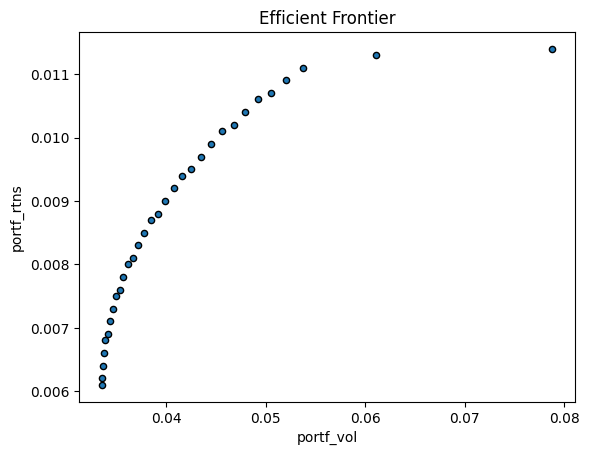

In [55]:
import matplotlib.pylab as plt
fig, ax = plt.subplots()
port_result.plot(kind='scatter', x='portf_vol',
                      y='portf_rtns',
                      cmap='RdYlGn', edgecolors='black', title='Efficient Frontier',
                      ax=ax)
plt.show()

<Axes: xlabel='portf_rtns'>

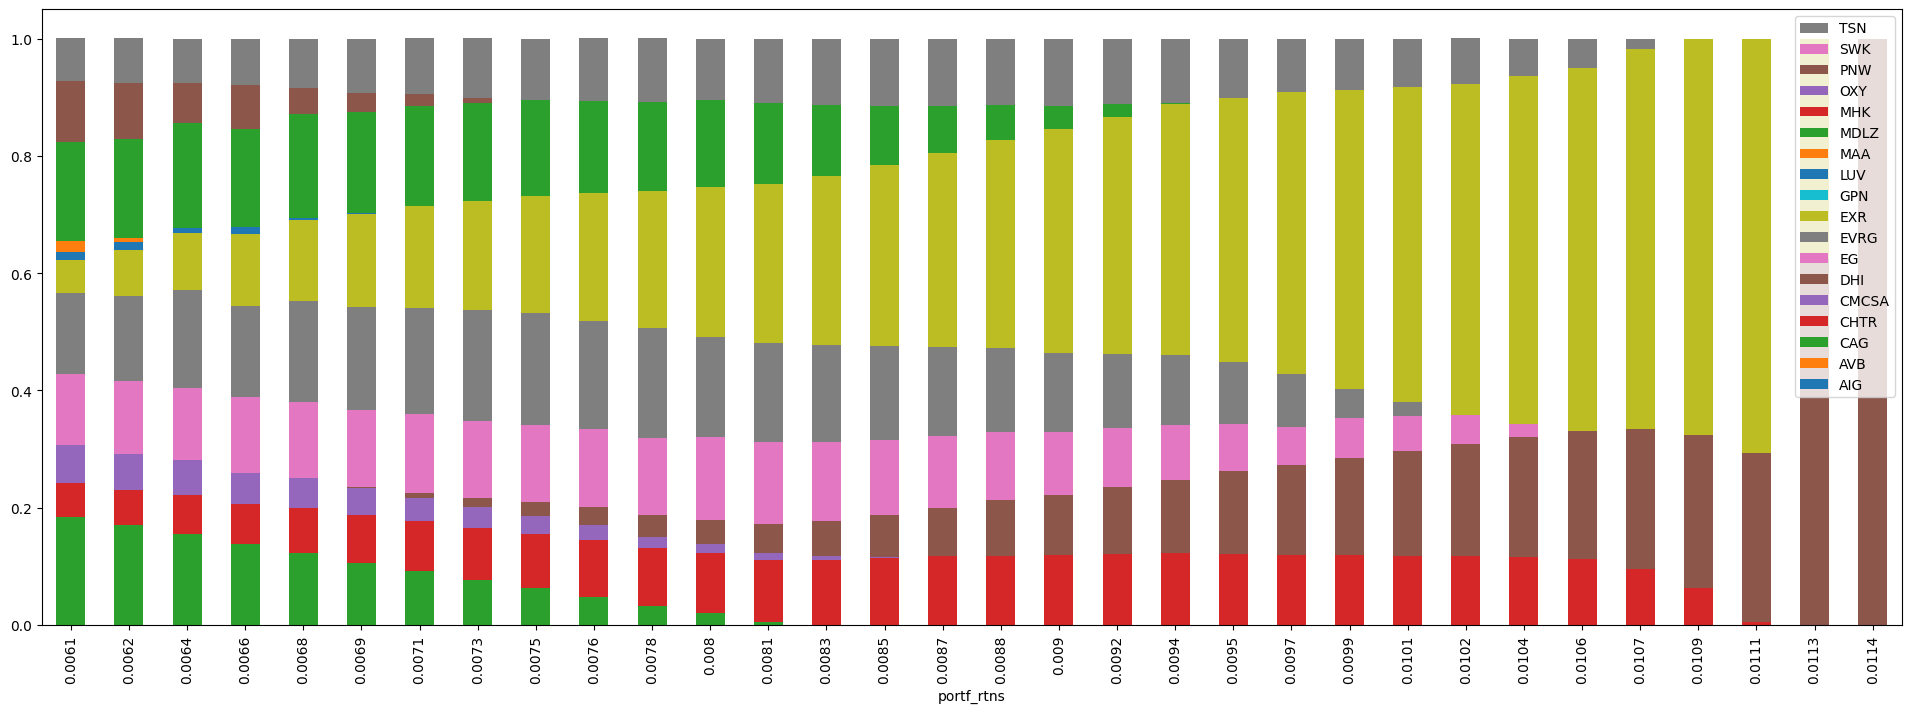

In [56]:
portfolio_weight_df= port_result_df.iloc[:,2:]  #  # 효율적 포트폴리오 결과치에서 자산별 비중만 추출
portfolio_weight_df.columns=df.columns  # 자산명

# 포트폴리오 기대수익률과 자산별 투자비중의 결합
port_all=  pd.concat([portfolio_weight_df, port_result[['portf_rtns']]],axis=1)
opt_port= port_all.set_index('portf_rtns')

# 포트폴리오 기대수익률에 따른 자산별 투자비중 변화 그래프
opt_port.plot.bar(stacked=True,legend='reverse', figsize=(24,8))

In [57]:
# 포트폴리오 변동성 계산

def get_portf_vol(weight, cov_mat):
    return np.sqrt(weight.T@cov_mat@weight)

In [58]:
# covmat= np.array(df.cov()*12) , weight=np.array(n_assets*[1/n_assets]).T

get_portf_vol(weight,covmat)

np.float64(0.039549891340826863)

In [59]:
# 포트폴리오 변동성 최소화를 위한 최적화

def minimum_variance_optimization(exp_ret,cov_mat):

    num_assets=len(exp_ret) # 자산갯수
    args=(cov_mat)          # 공분산 입력
    constraints=({'type': 'eq','fun': lambda x: np.sum(x)-1})
    bounds=[(0,1) for i in range(num_assets)]  # 자산별 비중 제약 (0, 1)

    result_mv= sco.minimize(get_portf_vol,num_assets*[1./num_assets],args=args, method='SLSQP',
                         bounds=bounds,constraints=constraints)
    MVO_Allocation =pd.DataFrame(result_mv.x,index=df.columns,columns=['allocation'])  # 종목명 인덱스만 가져다 쓴다.

    return round(MVO_Allocation*100,2)


최소분산 포트폴리오 비중:
        allocation
Ticker            
AIG           0.00
AVB           0.07
CAG          18.43
CHTR          5.46
CMCSA         6.62
DHI           0.00
EG           11.93
EVRG         14.84
EXR           5.30
GPN           0.00
LUV           1.01
MAA           2.60
MDLZ         17.59
MHK           0.00
OXY           0.00
PNW           9.55
SWK           0.00
TSN           6.61



<Axes: ylabel='Ticker'>

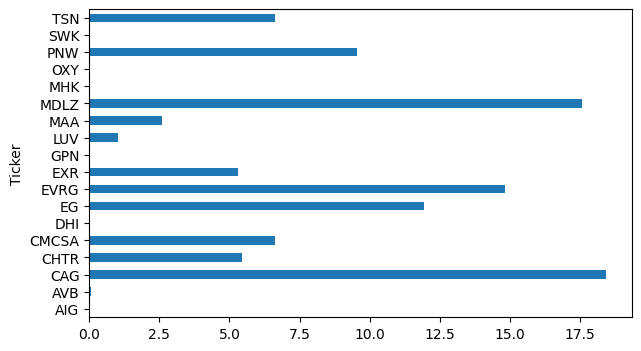

In [61]:
# 함수 결과값 확인

MVO =minimum_variance_optimization(avg_returns,covmat)
print(f"최소분산 포트폴리오 비중:\n{MVO}\n", )
MVO.plot.barh(figsize=(7, 4), legend=False)
